In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "/Users/atalianb/Documents/Doctorado/BosonStars/Shooting_LBS/script_v4/files_LBS/"

In [3]:
Vc2_l0 = np.loadtxt(path+"Vc2_l0_phi1.0.dat")
Vc2_l1 = np.loadtxt(path+"Vc2_l1_phi1.0.dat")
Vc2_l2 = np.loadtxt(path+"Vc2_l2_phi1.0.dat")
Vc2_l3 = np.loadtxt(path+"Vc2_l3_phi1.0.dat")

In [4]:
r_l0 = np.array([row[0] for row in Vc2_l0])# galactocentric distance [kpc]
Vc2_l0_1 = np.array([row[1] for row in Vc2_l0])# rotation velocity [km/s]
r_l1 = np.array([row[0] for row in Vc2_l1])# galactocentric distance [kpc]
Vc2_l1_1 = np.array([row[1] for row in Vc2_l1])# rotation velocity [km/s]
r_l2 = np.array([row[0] for row in Vc2_l2])# galactocentric distance [kpc]
Vc2_l2_1 = np.array([row[1] for row in Vc2_l2])# rotation velocity [km/s]
r_l3 = np.array([row[0] for row in Vc2_l3])# galactocentric distance [kpc]
Vc2_l3_1 = np.array([row[1] for row in Vc2_l3])# rotation velocity [km/s]

Text(0.5, 0, 'r[kpc]')

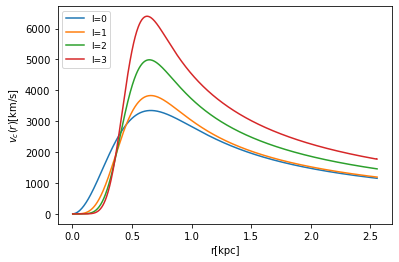

In [5]:
plt.plot(r_l0,Vc2_l0_1,label='l=0')
plt.plot(r_l1,Vc2_l1_1,label='l=1')
plt.plot(r_l2,Vc2_l2_1,label='l=2')
plt.plot(r_l3,Vc2_l3_1,label='l=3')
plt.legend(loc='upper left', prop={'size':9})
plt.ylabel(r'$v_{c}(r)$[km/s]')
plt.xlabel("r[kpc]")

In [6]:
def rescaling(phi_0,l):
    lmbd = (1./phi_0)**(1/(l+2.))
    return lmbd

In [34]:
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

In [61]:
dict_Vc2_r_rescal = {}

In [79]:
rs = [r_l0,r_l1,r_l2,r_l3]
Vc2 = [Vc2_l0_1,Vc2_l1_1,Vc2_l2_1,Vc2_l3_1]

In [82]:
for j in range(4):
    for i in my_range(0.001,0.01,0.005):
        #print(i)
        rescal_0 = rescaling(i,l=float(j))
        X0_rescal = rs[j]*rescal_0
        Vc2_0rescal = Vc2[j]/rescal_0**2.
        dict_Vc2_r_rescal['l'+str(j)]['phi_0_'+str(i)] = np.array([X0_rescal,Vc2_0rescal])

In [83]:
dict_Vc2_r_rescal['l0']['phi_0_0.001'][1]

array([0.00000000e+00, 1.11864774e-03, 2.42340014e-03, ...,
       1.15473088e+00, 1.15357614e+00, 1.15357614e+00])

In [86]:
len(dict_Vc2_r_rescal['l0']['phi_0_0.001'][1]),len(dict_Vc2_r_rescal['l3']['phi_0_0.006'][1])

(1001, 1001)

In [ ]:
for j in range(4):
    for i in my_range(0.001,0.01,0.005):
        Vc2_res = dict_Vc2_r_rescal['l'+str(j)]['phi_0_'+str(i)][1]

In [47]:
myrange = np.arange(0.001,0.01,0.005)

In [48]:
for i in range(len(myrange)):    
    rescal_0 = rescaling(myrange[i],l=0.)
    X0_rescal = r_l0*rescal_0
    Vc2_0rescal = Vc2_l0_1/rescal_0**2.
    dict_Vc2_r_rescal['l0_'+str(i)] = dict(X0=X0_rescal,Y0=Vc2_0rescal)

In [ ]:
#l=1
    rescal_1 = rescaling(i,l=1.)
    X1_rescal = r_l1*rescal_1
    Vc2_1rescal = Vc2_l1_1/rescal_1**2.
    dict_Vc2_r_rescal['l1']['phi_0_'+str(i)] = np.array([X1_rescal,Vc2_1rescal])
    #l=2
    rescal_2 = rescaling(i,l=2.)
    X2_rescal = r_l2*rescal_2
    Vc2_2rescal = Vc2_l2_1/rescal_2**2.
    dict_Vc2_r_rescal['l2']['phi_0_'+str(i)] = np.array([X2_rescal,Vc2_2rescal])
    #l=3
    rescal_3 = rescaling(i,l=3.)
    X3_rescal = r_l3*rescal_3
    Vc2_3rescal = Vc2_l3_1/rescal_3**2.
    dict_Vc2_r_rescal['l3']['phi_0_'+str(i)] = np.array([X3_rescal,Vc2_3rescal])